# Assignment for Data Analyst

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Understanding the data

### Importing the data

In [2]:
#Importing the dataset
df = pd.read_excel('Assignment file for Data Analyst.xlsx')
df.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


In [3]:
df.describe()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
count,3.110400e+04,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,3.110400e+04
mean,1.572253e+12,-0.003858,64.272196,0.828945,27.915732,0.948226,52.563840,0.999968,0.988137,221.494578,61.526272,9.442240e+05
std,8.979096e+09,33.170852,1.918436,0.134033,13.308070,0.019635,31.301743,0.005670,0.108273,299.129090,83.091414,5.556151e+05
min,1.556701e+12,-300.000000,48.160346,-0.155714,20.263275,0.919398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.564477e+12,0.000000,63.700213,0.781742,22.272948,0.932068,24.438458,1.000000,1.000000,0.000000,0.000000,4.466059e+05
50%,1.572253e+12,0.000000,65.299735,0.901914,26.060848,0.945187,52.499507,1.000000,1.000000,0.000000,0.000000,9.466569e+05
75%,1.580028e+12,10.000000,65.344541,0.905029,29.523420,0.963154,77.241660,1.000000,1.000000,617.410545,171.502929,1.386711e+06
max,1.587804e+12,10.000000,66.720000,1.000000,136.118156,1.000000,107.847718,1.000000,1.000000,654.014349,181.670653,1.913713e+06


### Checking for missing values

In [4]:
#Checking for missing values
df.isna().sum()

Timestamp                             0
Current                               0
Total voltage                         0
SOC                                   0
Temperature                           0
SOH                                   0
Equivalent cycle                      0
Application status                    0
Grid status                           0
Grid power                            0
Grid energy consumption               0
Grid cumulative energy consumption    0
dtype: int64

### Visualizing data

In [5]:
#A general function for comparative analysis over an interval
def comparative_plot(x,y1, y2, start, end, cycle=False, normalize_current=False,normalize_temperature=False):

    # Visualising data
    fig, ax1 = plt.subplots(1, 1, figsize=(15, 8))

    # Setting plot specifications
    plt.title('Comparative Analysis', fontsize=15)

    kwargs = {}
    if (cycle):
        kwargs = {"hue": "Cycle", "palette": "Set1"}

    color = 'tab:red'
    ax1.set_xlabel(x, size=13)
    ax1.set_ylabel(y1, color=color, size=13)
    sns.scatterplot(
        x=x,
        y=y1,
        color=color,
        data=df[start:end][:],
        marker="o",
        s=100,
        **kwargs)
    ax1.tick_params(axis='y', labelcolor=color, size=13, labelsize=12)
    ax1.tick_params(axis='x', labelsize=12, size=13)
    plt.legend(labels=[y1], loc='lower right')

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel(y2, color=color, size=13)
    sns.scatterplot(
        x=x,
        y=y2,
        color=color,
        data=df[start:end][:],
        marker="+",
        s=100,
        **kwargs)
    ax2.tick_params(axis='y', labelcolor=color, size=13)

    if (normalize_current):
        ax2.set_ylim(-1, 15)
    elif(normalize_temperature):
        ax2.set_ylim(20, 35)
    
    fig.tight_layout()

    return

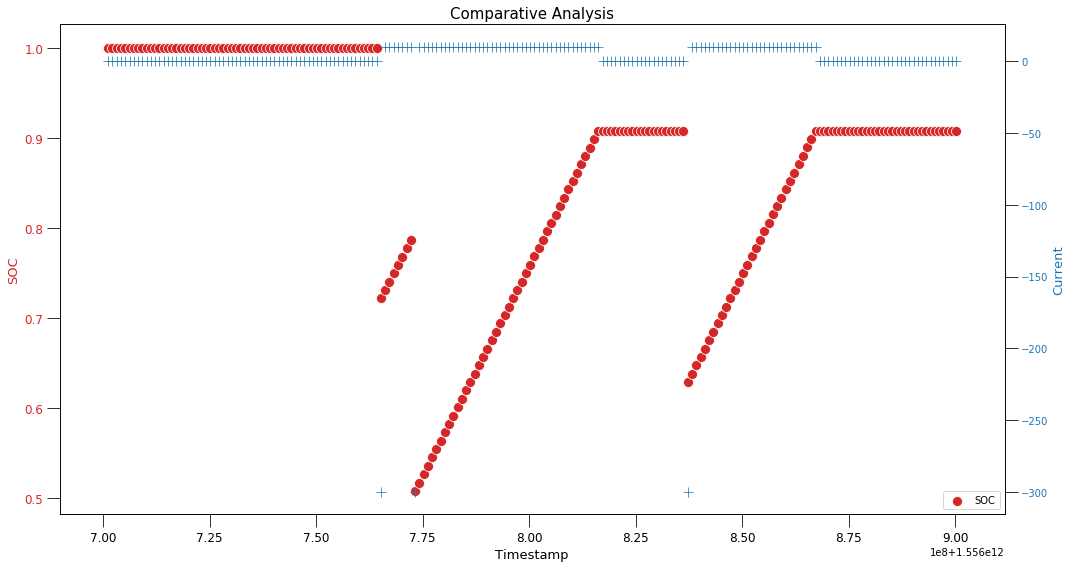

In [6]:
#Visualising SOC and Current over an interval
comparative_plot('Timestamp','SOC','Current',0,200)

>From the above plot we can see the **presence of cyclycity in SOC data**. On a careful analysis, we find that at every cycle switch, the **current drops to -300**. We will use this information to **number our cycles**.

>Let's separate the cycles!

In [7]:
#Separating Cycles
n=1
cycle=[]
for current in df['Current']:
    if current==-300:
        n=n+1
    cycle.append(n)
df['Cycle']=cycle

In [8]:
df.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption,Cycle
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0,1
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0,1
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0,1
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0,1
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0,1


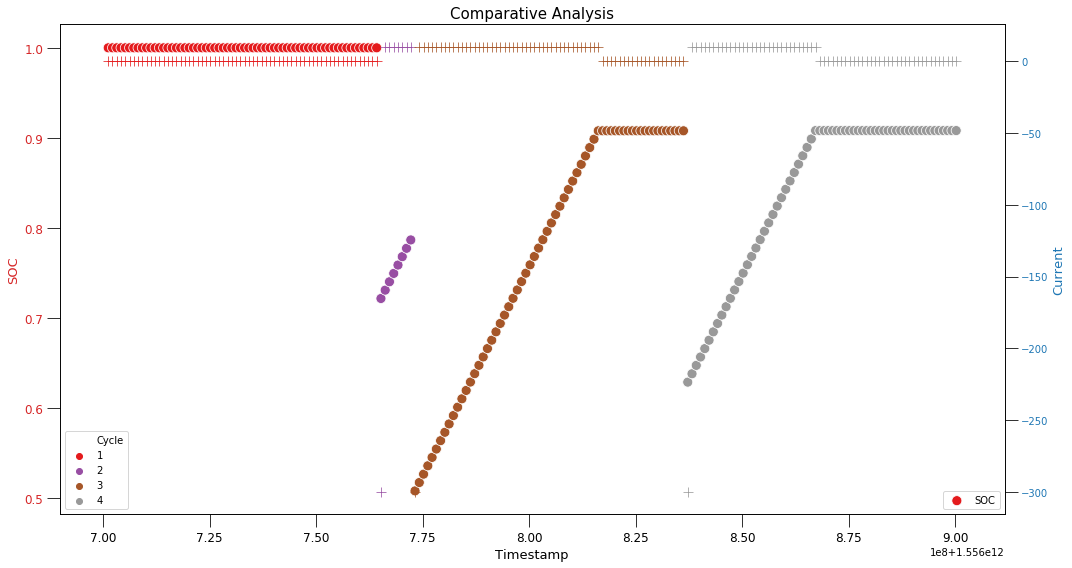

In [9]:
#Visualising SOC and Current over an interval
comparative_plot('Timestamp','SOC','Current',0,200,cycle=True)

>We can now clearly see the separation of cycles. It looks like different charging curves. Let's analyze further!

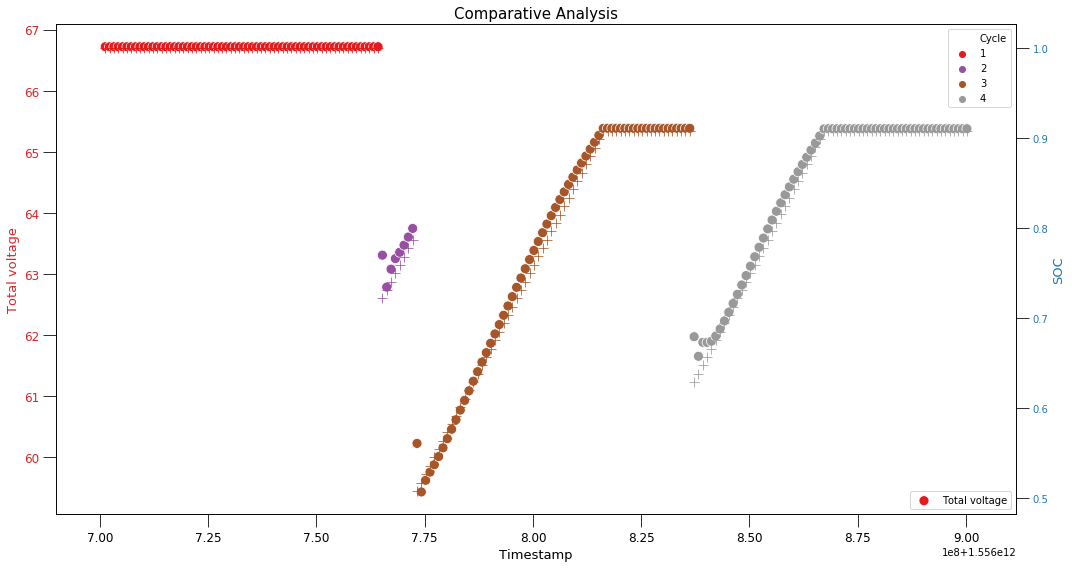

In [10]:
#Visualising Voltage and SOC over an interval
comparative_plot('Timestamp','Total voltage','SOC',0,200,cycle=True)

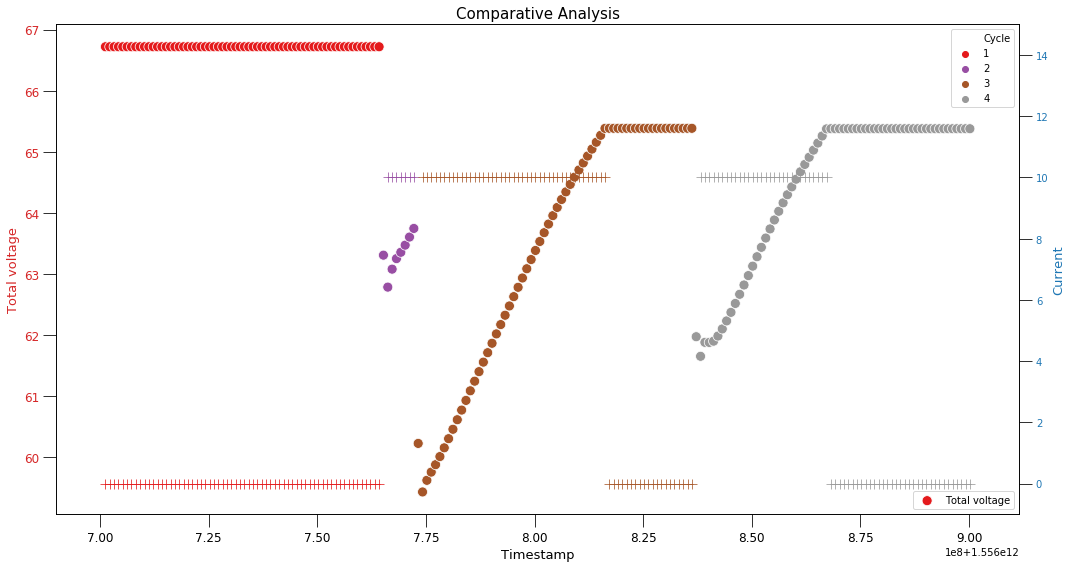

In [11]:
#Visualising Voltage and Current over an interval
comparative_plot('Timestamp','Total voltage','Current',0,200,cycle=True,normalize_current=True)

>Analyzing the graph it looks like a charging process that starts with a constant current of 10 units and when the SOC reaches close to 90%, the charging switches to a constant voltage mode and the current becomes zero. This resembles one of the common battery charging profiles called the Constant Current - Constant Voltage (CC-CV) charging profile. Generally, the current is brought down gradually so that the battery saturates itslef instead of the on-off condition here.

>Now that we understand the data, let's move on towards our goal!

## Achieving the Goal

### 1. Correlation between Grid Status and SOC

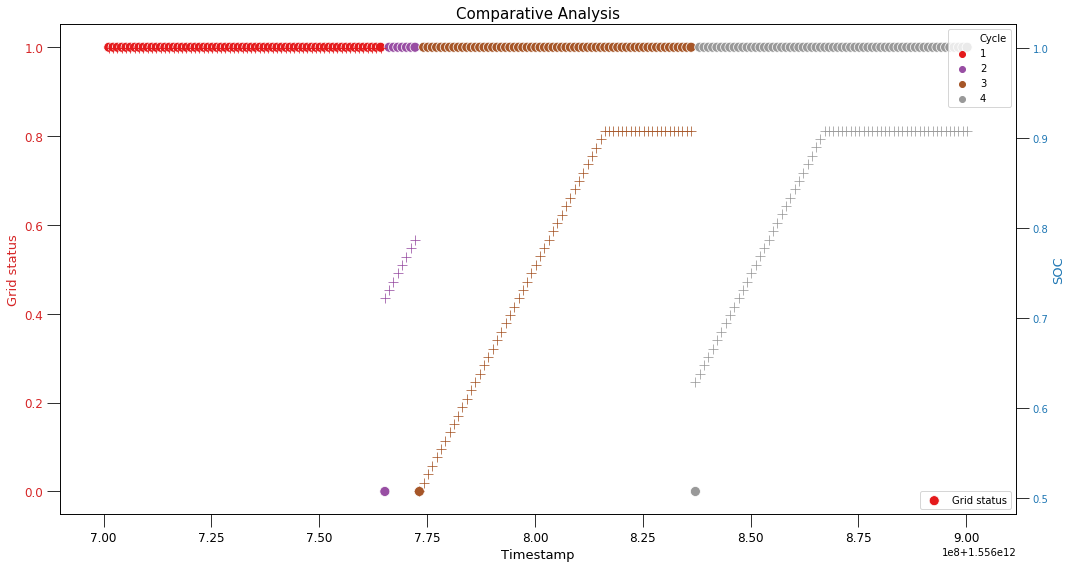

In [12]:
#Visualising SOC and Grid Status over an interval
comparative_plot('Timestamp','Grid status','SOC',0,200,cycle=True)

>From the graph above, it's evident that as long as the **Grid status == 1** (Grid is ON) the **charging of battery continues in a cycle** and its **SOC increases till 90% and remains costant thereafter**. The moment it switches to 0, a  **new charging cycle begins**.

### 2. Correlation between Equivalent cycles and SOH

>State of Health (SOH) is a long-term concept. There is no presence of cyclicity in this; instead, it's continuously decreasing, quantifying the charge storage capacity of the battery which degrades with repeated charging/discharging.

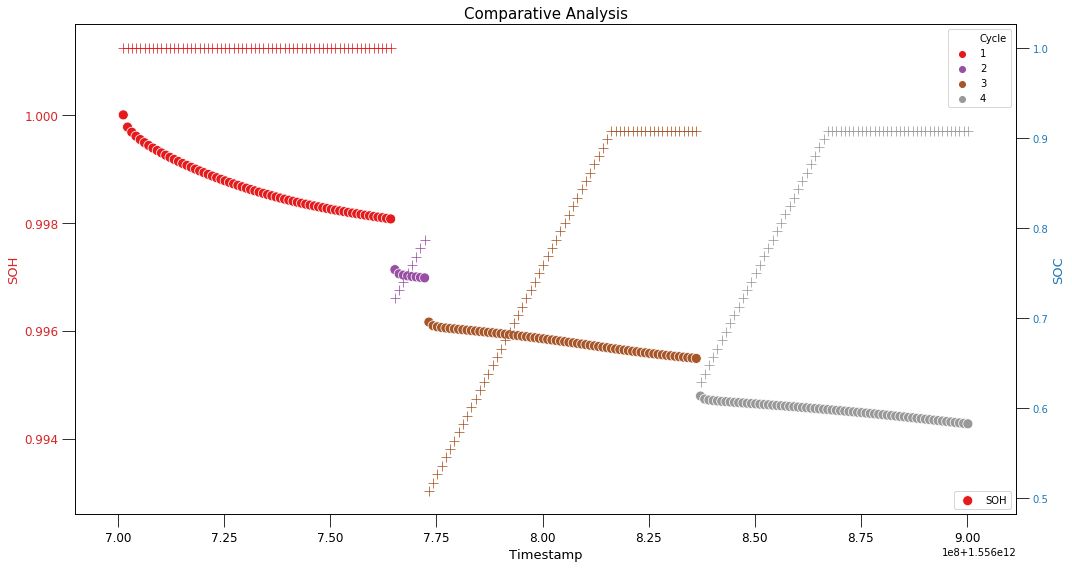

In [13]:
#Visualising SOC and SOH over an interval
comparative_plot('Timestamp','SOH','SOC',0,200,cycle=True)

>But if we look at equivalent cycles, it too increases continuously throughout the battery life but it has some cyclic component that corresponds to the SOC cycle. In each cycle, Equivalent cycle increases as SOC increases and becomes constant as SOC gets constant.

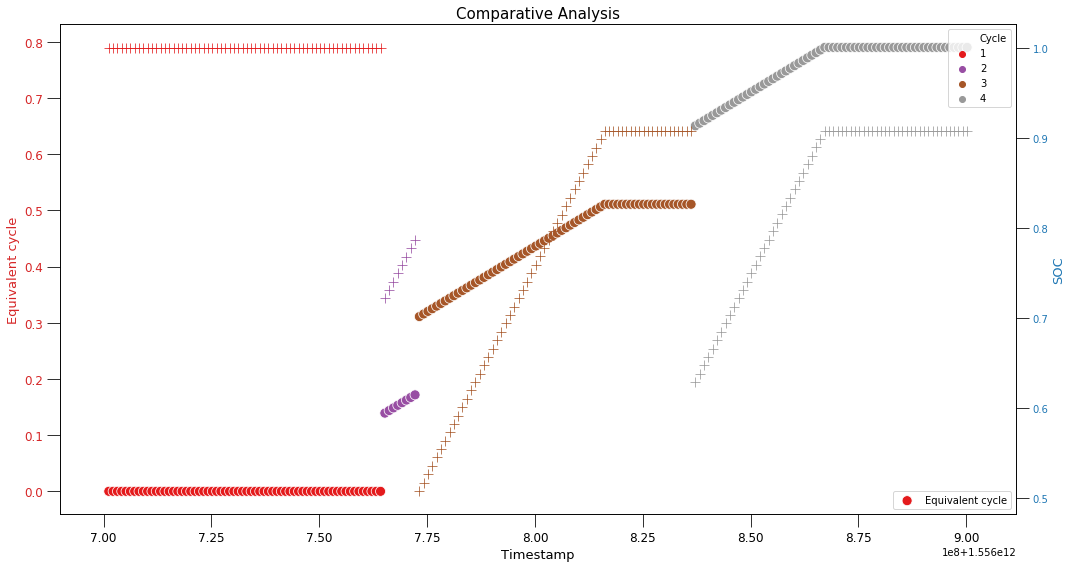

In [14]:
#Visualising SOC and Equivalent cycle over an interval
comparative_plot('Timestamp','Equivalent cycle','SOC',0,200,cycle=True)

>Let's check for the **overall trend**!

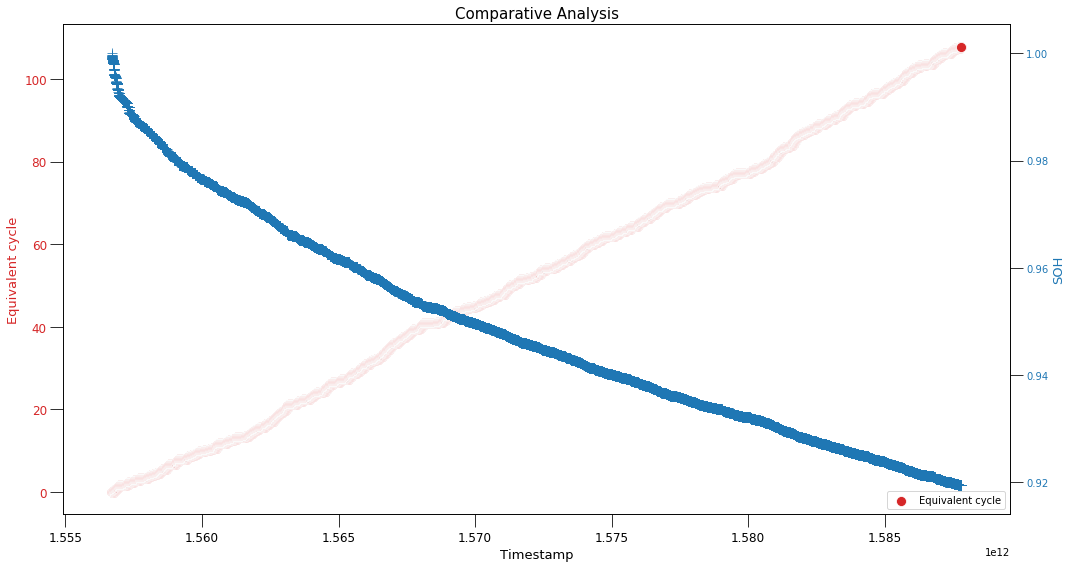

In [15]:
#Visualising SOH and Equivalent cycle over an interval
comparative_plot('Timestamp','Equivalent cycle','SOH',0,31103)

>There's clearly a **negative correlation** between **SOH** and **Equivalent cycle**. To quantify this correlation let's use the **Pearson's correlation coefficient**.

In [16]:
#Calculating the correlation coefficient
df['Equivalent cycle'].corr(df['SOH'])

-0.9842624478536399

>The correlation coefficient comes out to be **-0.98** which is very high, as was observed through the graph. 

>**A linear negative correlation between Equivalent cycle and SOH**.

>Now, the results are quite satisfactory but since we saw some cyclicity in Equivalent cycle, we can analyze further. We can group both the variables cycle-wise and calculate correlation coefficient for each cycle and then check the distribution of the correlations for all cycles. This would be a more detailed analysis.

In [17]:
#Grouping data by cycle and calculating correlation
corr = []
for cycle in df.groupby(['Cycle']).groups:
    temp = df.groupby(['Cycle']).get_group(cycle)
    corr.append(temp['Equivalent cycle'].corr(temp['SOH']))

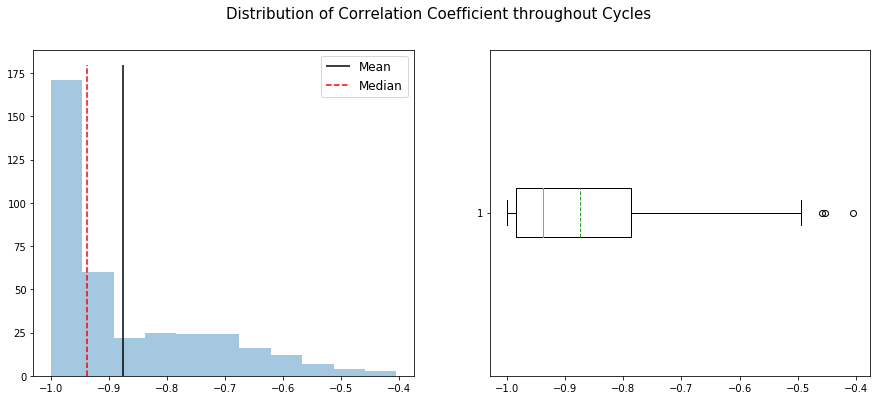

In [19]:
#Visualising the Correlation Distribution
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle(
    'Distribution of Correlation Coefficient throughout Cycles', fontsize=15)

#Histogram distribution
plt.subplot(1, 2, 1)
sns.distplot(
    corr[1:], hist=True, kde=False, kde_kws={
        'shade': True,
        'linewidth': 3
    })

bottom, top = plt.ylim()

# Plot black line at mean
plt.vlines(
    np.mean(corr[1:]),
    ymin=bottom,
    ymax=top,
    color='black',
    linewidth=1.5,
    label='Mean')

# Plot red line at median
plt.vlines(
    np.median(corr[1:]),
    ymin=bottom,
    ymax=top,
    linewidth=1.5,
    linestyles='dashed',
    color="red",
    label='Median')

plt.legend(fontsize=12)

#Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(
    corr[1:], vert=False, meanline=True, showmeans=True);

In [20]:
print("Mean = ",np.mean(corr[1:]))

Mean =  -0.8750720854643915


In [21]:
print("Median = ",np.median(corr[1:]))

Median =  -0.9379451435616057


>This gives us a clearer picture of the correlation between Equivalent cycle and SOH. We are still confident that there's strong a negative correlation between them. But we can also see lower values of correlation coefficient for some cycles which were not evident previously.

### 3. Correlation between Temperature and SOC

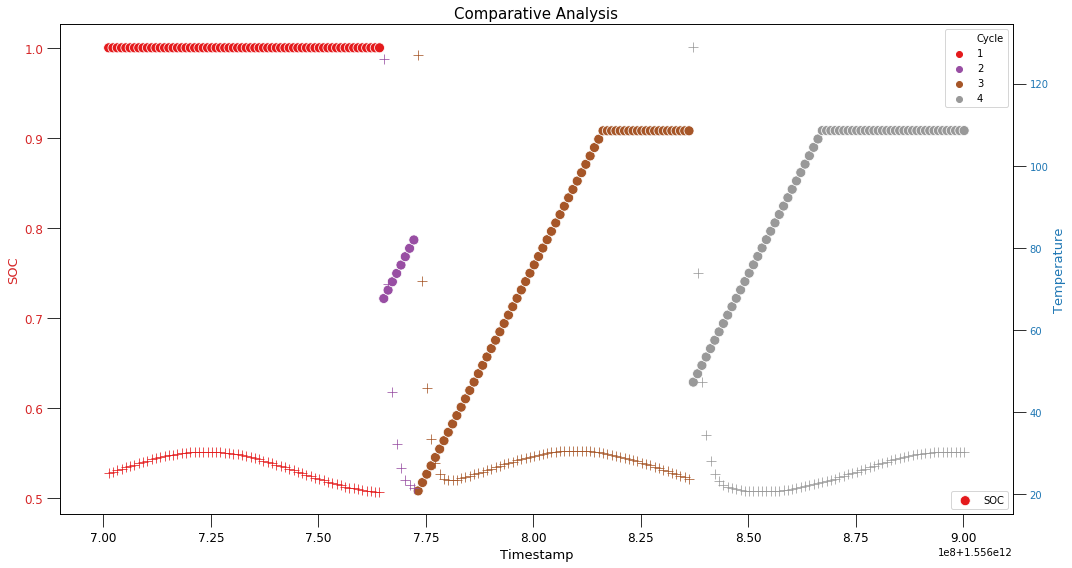

In [22]:
#Visualising SOC and Temperature over an interval
comparative_plot('Timestamp','SOC','Temperature',0,200,cycle=True)

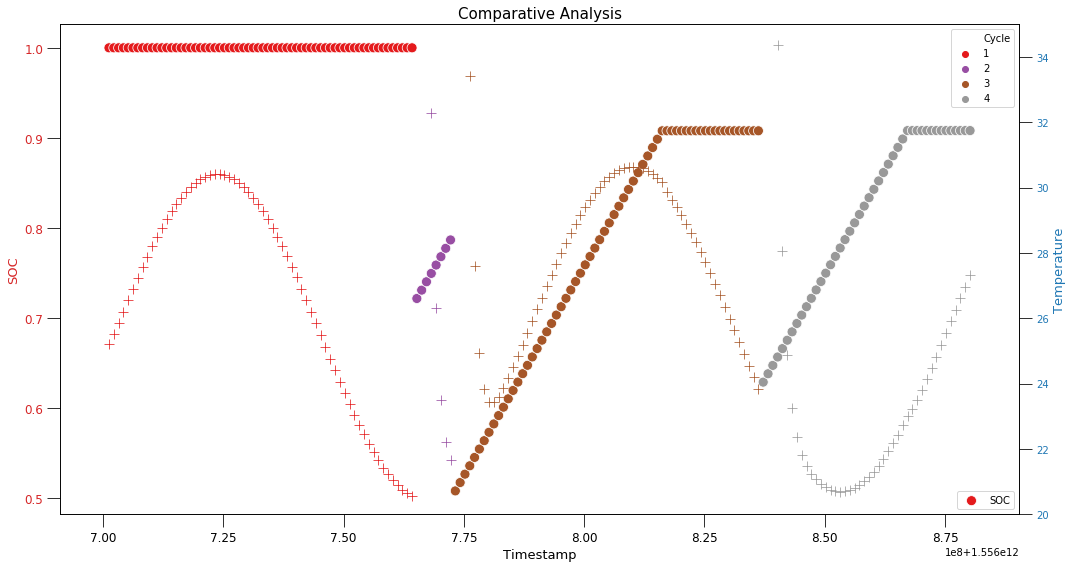

In [23]:
#Visualising SOC and Grid Status over an interval
comparative_plot('Timestamp','SOC','Temperature',0,180,cycle=True,normalize_temperature=True) 

>Analyzing the above graphs we find:

>1. Temperature follows a cyclic path irrespective of SOC with a time period of about 90*1000 seconds = 25 hours.
>2. It oscillates between values 20 - 30, when in its cyclic path.
>3. Whenever there is a cycle change, the temperature reading fluctuates wildly upto 130 for a short duration before returning to its original cycle again.
>4. Cycle change of SOC does not alter the time period of temperature oscillations.

>There is **no correlation between SOC and Temperature**.